# Exploración inicial de datos farmacéuticos

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración para visualización
plt.style.use('seaborn-v0_8')


# ETL
Los datos utilizados provienen del pipeline ETL Final desarrollado en el archivo ETLFinal.py, el cual realiza la carga, limpieza, transformación y validación de calidad del dataset. El ETL genera un archivo procesado (datosCompletosProcesados.csv) que es el que se utiliza en este notebook para el análisis final

In [ ]:

# Cargar el dataset procesado generado por el ETL final
df = pd.read_csv("/content/datosCompletosProcesados.csv")

print("Filas cargadas:", len(df))
df.head()


Filas cargadas: 30000


,ClienteID,NombreCliente,Edad,Ciudad,ProductoID,NombreProducto,CategoríaProducto,FechaCompra,Cantidad,PrecioUnitario,TotalVenta
0,C00001,Mtro. Modesto Hurtado,31,Nueva Paraguay,P485,Magnesio,Suplemento,2025-04-05,5,70.39,351.95
1,C00002,Hugo Marisela Trujillo,76,San Luis Manuel los bajos,P398,Cetirizina,Antihistamínico,2024-12-18,1,116.89,116.89
2,C00003,Rosa Eugenia Portillo,18,San Aida los altos,P353,Diclofenaco,Analgésico,2024-06-21,2,152.11,304.22
3,C00004,Alfredo Regalado,42,San Luis Manuel los bajos,P349,Fexofenadina,Antihistamínico,2024-08-21,5,37.37,186.85
4,C00005,Beatriz Irene Toro Serrano,35,San Cristian los altos,P284,Ranitidina,Antiácido,2024-10-07,3,66.73,200.19


In [ ]:

# Información del DataFrame
df.info()

# Revisión de nulos
print("\nNulos por columna:")
print(df.isnull().sum())


print("Duplicados:", df.duplicated().sum())

# Outliers básicos
df[['Cantidad','PrecioUnitario','TotalVenta']].describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ClienteID           30000 non-null  object        
 1   NombreCliente       30000 non-null  object        
 2   Edad                30000 non-null  int64         
 3   Ciudad              30000 non-null  object        
 4   ProductoID          30000 non-null  object        
 5   NombreProducto      30000 non-null  object        
 6   CategoríaProducto   30000 non-null  object        
 7   FechaCompra         30000 non-null  object        
 8   Cantidad            30000 non-null  int64         
 9   PrecioUnitario      30000 non-null  float64       
 10  TotalVenta          30000 non-null  float64       
 11  FechaCompra_parsed  30000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 2.7+ MB

Nulos por columna:
Client

,Cantidad,PrecioUnitario,TotalVenta
count,30000.000000,30000.000000,30000.000000
mean,3.011867,104.704894,315.821473
std,1.412041,54.801495,235.295582
min,1.000000,10.000000,10.000000
25%,2.000000,57.360000,126.487500
50%,3.000000,104.500000,255.375000
75%,4.000000,152.060000,463.837500
max,5.000000,200.000000,999.700000


# Creacion de KPIs

In [ ]:

# Crear KPIs iniciales
kpis = {
    "Ventas Totales": df["TotalVenta"].sum(),
    "Número de Transacciones": len(df),
    "Ticket Promedio": df["TotalVenta"].mean(),
    "Clientes Únicos": df["ClienteID"].nunique(),
    "Productos Únicos": df["ProductoID"].nunique()
}

pd.DataFrame.from_dict(kpis, orient="index", columns=["Valor"])


,Valor
Ventas Totales,9.474644e+06
Número de Transacciones,3.000000e+04
Ticket Promedio,3.158215e+02
Clientes Únicos,3.000000e+04
Productos Únicos,4.990000e+02


In [ ]:
# KPIS

# Ventas Totales
ventas_totales = df["TotalVenta"].sum()

# Número de Transacciones
num_transacciones = len(df)

# Ticket Promedio
ticket_promedio = ventas_totales / num_transacciones if num_transacciones > 0 else 0

# Clientes Únicos
clientes_unicos = df["ClienteID"].nunique()

# Ventas por Categoría
ventas_categoria = df.groupby("CategoríaProducto")["TotalVenta"].sum().sort_values(ascending=False)

# Top 5 Productos por ventas
top_productos = df.groupby("NombreProducto")["TotalVenta"].sum().sort_values(ascending=False).head(5)

# % Ventas por Ciudad
ventas_ciudad = df.groupby("Ciudad")["TotalVenta"].sum()
porcentaje_ciudad = (ventas_ciudad / ventas_totales * 100).sort_values(ascending=False)



# Mostrar resultados
print("KPIs preliminares")
print(f"Ventas Totales: ${ventas_totales:,.2f}")
print(f"Número de Transacciones: {num_transacciones}")
print(f"Ticket Promedio: ${ticket_promedio:,.2f}")
print(f"Clientes Únicos: {clientes_unicos}\n")

print("Ventas por Categoría:")
print(ventas_categoria, "\n")

print("Top 5 Productos más vendidos:")
print(top_productos, "\n")

print("Porcentaje de ventas por Ciudad:")
print(porcentaje_ciudad)




KPIs preliminares
Ventas Totales: $9,474,644.20
Número de Transacciones: 30000
Ticket Promedio: $315.82
Clientes Únicos: 30000

Ventas por Categoría:
CategoríaProducto
Suplemento         1605570.75
Antihistamínico    1602685.36
Analgésico         1578980.75
Antibiótico        1578630.98
Antidiabético      1561557.18
Antiácido          1547219.18
Name: TotalVenta, dtype: float64 

Top 5 Productos más vendidos:
NombreProducto
Diclofenaco      413303.61
Vitamina D       412170.00
Desloratadina    409771.79
Lansoprazol      409741.98
Ibuprofeno       409239.57
Name: TotalVenta, dtype: float64 

Porcentaje de ventas por Ciudad:
Ciudad
Nueva Côte d'Ivoire           0.194499
Nueva Costa Rica              0.190644
Nueva Sierra Leona            0.190409
Nueva Tailandia               0.187721
Nueva El Salvador             0.187421
                                ...   
San Lucas los bajos           0.013991
San Óliver de la Montaña      0.012955
San Abelardo de la Montaña    0.012840
San Violeta

# Grafica de Top 25 ciudades por Ventas

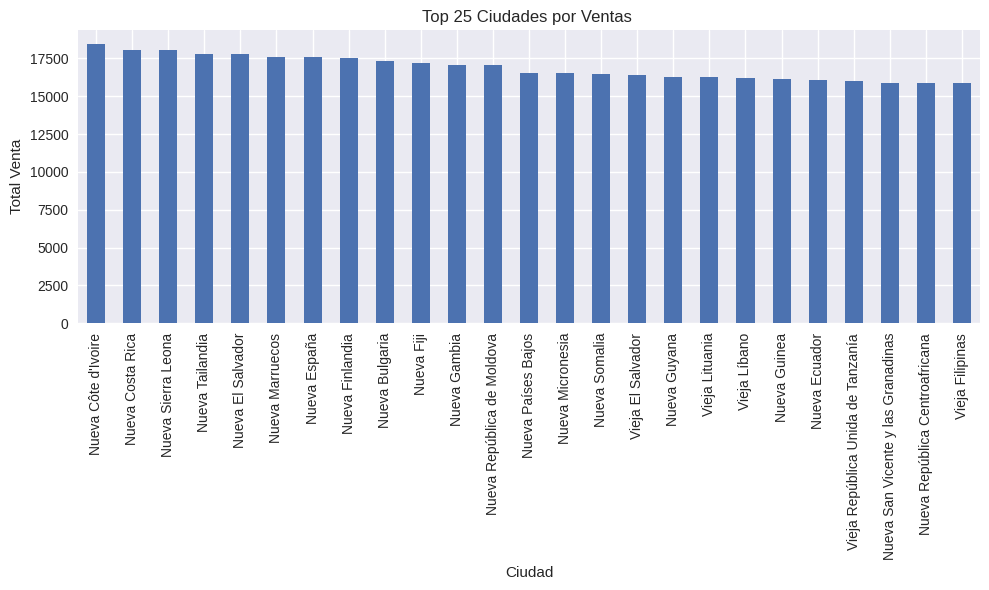

In [ ]:

ventas_ciudad = df.groupby("Ciudad")["TotalVenta"].sum().sort_values(ascending=False)
ventas_ciudad.head(25).plot(kind="bar", figsize=(10,6))
plt.title("Top 25 Ciudades por Ventas ")
plt.ylabel("Total Venta")
plt.xlabel("Ciudad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Las 25 ciudades principales concentran una parte considerable del total de ventas, mientras que el resto de las más de 1,400 ciudades tienen contribuciones marginales.
La concentración geográfica ayuda a identificar cuáles mercados deben recibir prioridad en promociones, inversión o expansión de tiendas físicas.
La empresa puede enfocar recursos en estas ciudades de mayor demanda, optimizando campañas regionales y fortaleciendo la presencia de marca.

# Grafica de Ventas por Categoría

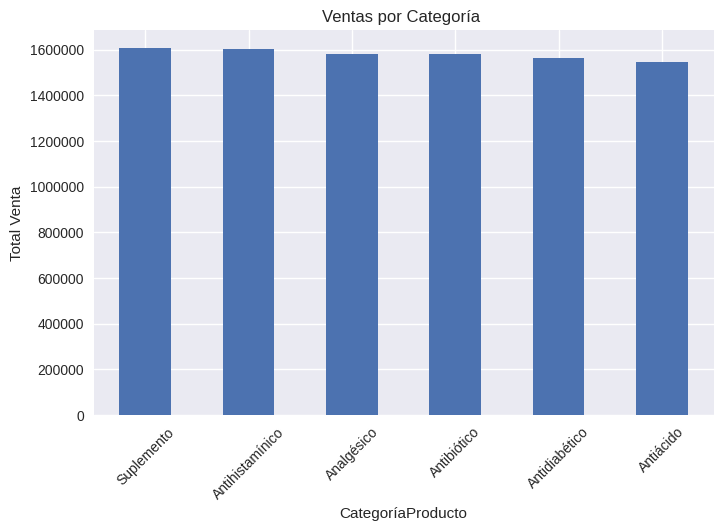

In [ ]:

ventas_categoria = df.groupby("CategoríaProducto")["TotalVenta"].sum().sort_values(ascending=False)
ventas_categoria.plot(kind="bar", figsize=(8,5))
plt.title("Ventas por Categoría ")
plt.ylabel("Total Venta")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()


La categoría Suplementos es la más rentable, superando ligeramente a Antihistamínicos y Analgésicos. Esta concentración en productos de bienestar coincide con tendencias actuales de salud preventiva y sugiere una oportunidad clara para fortalecer el inventario y promociones en esta línea.
La diferencia entre la categoría más vendida y la menos vendida es mínima (menos del 4%), lo que indica un portafolio bien distribuido y estable, reduciendo riesgo de dependencia de un solo segmento. Para la dirección, esto implica que no es necesario hacer cambios drásticos en el mix de productos, pero sí aprovechar el potencial de crecimiento en suplementos.

# Grafica de Ventas en el Tiempo (Semanalmente)

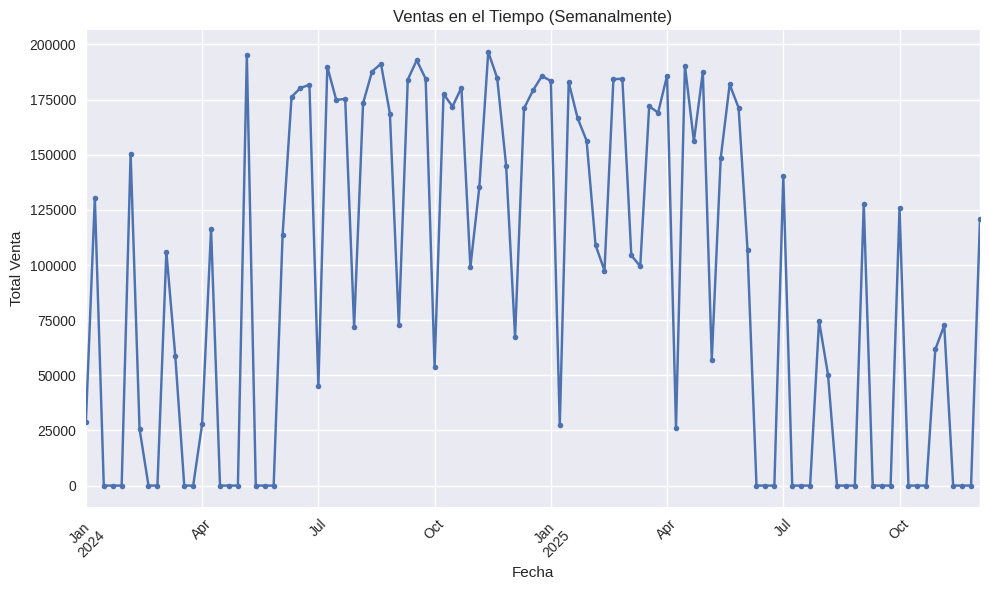

In [ ]:


# Ventas semanales en el tiempo
# Reagrupar ventas semanalmente para identificar tendencia temporal
ventas_tiempo = df.groupby(pd.Grouper(key="FechaCompra_parsed", freq="W"))["TotalVenta"].sum()

ventas_tiempo.plot(figsize=(10,6), marker="o", markersize=4)
plt.title("Ventas en el Tiempo (Semanalmente)")
plt.ylabel("Total Venta")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Entre julio de 2024 y julio de 2025, se observa un incremento  en las ventas. Esta tendencia sugiere un crecimiento orgánico del negocio, mayor demanda o una expansión comercial de la farmacia.
Fuera de ese periodo, las ventas semanales disminuyen significativamente, lo que puede indicar estacionalidad o falta de datos completos en los meses extremos.
Para la toma de decisiones, esta gráfica permite anticipar temporadas de mayor demanda y ajustar inventarios o personal en los meses con crecimiento acelerado.

# Heatmap de Ventas por Dia y Mes

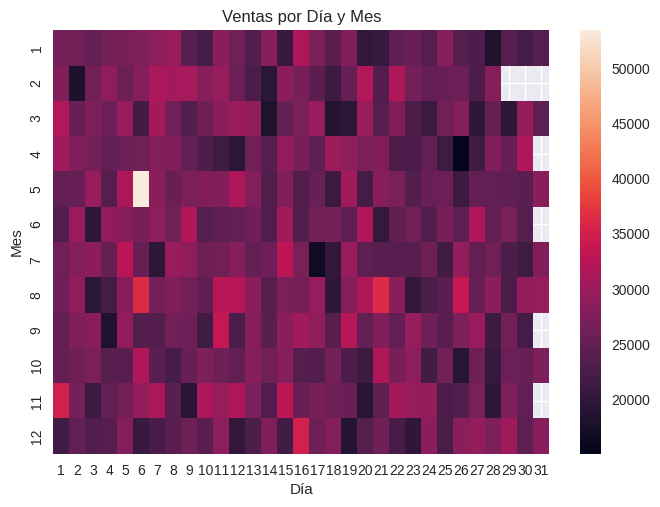

In [ ]:
#Heatmap
import seaborn as sns

df['Dia'] = df['FechaCompra_parsed'].dt.day
df['Mes'] = df['FechaCompra_parsed'].dt.month

pivot = df.pivot_table(values='TotalVenta', index='Mes', columns='Dia', aggfunc='sum')
sns.heatmap(pivot)
plt.title('Ventas por Día y Mes')
plt.xlabel('Día')
plt.ylabel('Mes')
plt.show()

El heatmap muestra patrones de estacionalidad fina. El 6 de mayo destaca como el día con mayor volumen de ventas, superando los $50,000, lo que sugiere una campaña particular o demanda relacionada con fechas especiales.
También se identifican días con ventas notablemente más altas en períodos específicos, lo cual puede utilizarse para optimizar estrategias de promoción o reposición.
Para el negocio, estos patrones permiten reforzar inventarios antes de fechas pico, planear promociones específicas y prever sobrecargas operativas.

In [ ]:
#Dashboard en Streamlit
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# config del dashboard
st.set_page_config(
    page_title="Dashboard Farmacia BI",
    page_icon="",
    layout="wide"
)

st.title("Dashboard Interactivo - Farmacia")
st.markdown("---")


# carga de los datos

@st.cache_data
def load_data():
    df = pd.read_csv("C:\\Users\\luism\\OneDrive\\Documentos\\A. 9no Semestre\\Temas 2\\Procesamiento de datos\\datosCompletosProcesados.csv")
    df["FechaCompra"] = pd.to_datetime(df["FechaCompra"])
    df["Dia"] = df["FechaCompra"].dt.day
    df["Mes"] = df["FechaCompra"].dt.month
    return df

df = load_data()

# Filtros interactivos
st.sidebar.header(" Filtros del Dashboard")

# Filtro 1: Rango de fechas
min_date = df["FechaCompra"].min()
max_date = df["FechaCompra"].max()

fecha_seleccion = st.sidebar.date_input(
    "Rango de Fechas",
    value=[min_date, max_date],
    min_value=min_date,
    max_value=max_date
)

df = df[(df["FechaCompra"] >= pd.to_datetime(fecha_seleccion[0])) &
        (df["FechaCompra"] <= pd.to_datetime(fecha_seleccion[1]))]

# Filtro 2: Categoría
categorias = df["CategoríaProducto"].unique()
categoria_sel = st.sidebar.multiselect(
    "Categoría de Producto",
    categorias,
    default=categorias
)

df = df[df["CategoríaProducto"].isin(categoria_sel)]

# Filtro 3: Selección para Top N productos
top_n = st.sidebar.slider("Top N Productos Más Vendidos", 5, 20, 5)

st.sidebar.markdown("---")

# KPIs
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric(" Ventas Totales", f"${df['TotalVenta'].sum():,.2f}")

with col2:
    st.metric(" Transacciones", f"{len(df):,}")

with col3:
    st.metric(" Clientes Únicos", df["ClienteID"].nunique())

with col4:
    ticket = df["TotalVenta"].mean()
    st.metric(" Ticket Promedio", f"${ticket:,.2f}")

st.markdown("---")

# graficas

#1. Ventas por categoría
st.subheader(" Ventas por Categoría")

ventas_categoria = df.groupby("CategoríaProducto")["TotalVenta"].sum().sort_values()

fig1, ax1 = plt.subplots(figsize=(8,4))
ventas_categoria.plot(kind="barh", ax=ax1, color="royalblue")
ax1.set_xlabel("Ventas Totales")
ax1.set_ylabel("Categoría")
st.pyplot(fig1)

#2. Ventas en el tiempo (selector de periodicidad)
st.subheader("Ventas en el Tiempo")

periodo = st.selectbox("Selecciona periodicidad:", ["Semanal", "Mensual", "Diaria"])

if periodo == "Semanal":
    df_periodo = df.set_index("FechaCompra").resample("W")["TotalVenta"].sum()
elif periodo == "Mensual":
    df_periodo = df.set_index("FechaCompra").resample("M")["TotalVenta"].sum()
else:
    df_periodo = df.set_index("FechaCompra")["TotalVenta"]

fig2, ax2 = plt.subplots(figsize=(10,4))
df_periodo.plot(ax=ax2, color="darkgreen")
ax2.set_ylabel(f"Ventas ({periodo})")
ax2.set_xlabel("Fecha")
st.pyplot(fig2)

#3. Top N productos interactivo
st.subheader(f" op {top_n} Productos Más Vendidos")

top_products = df.groupby("NombreProducto")["TotalVenta"].sum().nlargest(top_n)

fig3, ax3 = plt.subplots(figsize=(8,4))
top_products.plot(kind="bar", ax=ax3, color="darkred")
ax3.set_ylabel("Ventas Totales")
ax3.set_xlabel("Producto")
plt.xticks(rotation=45)
st.pyplot(fig3)

#4. Heatmap
st.subheader("Heatmap de Ventas por Dia y Mes")

pivot = df.pivot_table(values="TotalVenta", index="Mes", columns="Dia", aggfunc="sum")

fig4, ax4 = plt.subplots(figsize=(12,4))
sns.heatmap(pivot, cmap="inferno", ax=ax4)
st.pyplot(fig4)

st.markdown("---")
st.success("Dashboard Interactivo generado correctamente ")

#Correr en terminal con -> [streamlit run dashboard.py]


# Interpretación crítica


El análisis de los 30,000 registros de transacciones farmacéuticas permite identificar patrones de comportamiento comercial, preferencia de productos, estacionalidad y **distribución** de ventas a nivel geográfico. A continuación se presenta una interpretación crítica basada en los KPIs calculados y en las visualizaciones generadas.

Volumen general y rentabilidad

** El ticket promedio de $315.82 sugiere compras relativamente homogéneas y de bajo riesgo, lo cual es habitual en farmacias tradicionales donde predominan los productos de uso regular.**

El hecho de que Clientes Únicos = 30,000 indica que el dataset contiene una transacción por cliente, lo cual limita el análisis de recurrencia, retención y lealtad. Este comportamiento sugiere que los datos fueron generados de manera simulada o que la estructura del negocio prioriza ventas de mostrador sin seguimiento individual.

El KPI de Ventas por Categoría revela una distribución altamente equilibrada, pero con diferencias relevantes:

Categoría	Ventas

1.   Suplemento $1,605,570.75

2.   Antihistamínico	$1,602,685.36

Suplementos posicionan como la categoría más vendida. Este resultado coincide con tendencias actuales de consumo relacionadas con bienestar, salud preventiva y automedicación leve.

Concentración de productos más vendidos

El Top 5 de productos:

Diclofenaco — $413,303.61

Vitamina D — $412,170.00

Desloratadina — $409,771.79

Lansoprazol — $409,741.98

Ibuprofeno — $409,239.57

Síntesis general de interpretación crítica

En conjunto, los resultados indican:

Un portafolio diversificado, sin dependencia extrema de una sola categoría o producto.

Crecimiento en ventas en el periodo 2024–2025, lo cual es positivo para la proyección comercial.

Altísima dispersión geográfica, lo que sugiere analizar regiones prioritarias. texto en cursiva

# Limitaciones del análisis




No se tienen datos de costos → no se calcula margen

No se tienen direcciones exactas → no hay análisis geográfico completo

No se conoce si hay promociones

